## Лабораторная работа 1
#### Выполнил: Граур Арсений `5130901/10203`

Установим необходимые пакеты

In [2]:
%pip install -r ThinkDSP/requirements.txt

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.6 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -------------------------------------- 165.5/165.5 kB 5.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached charset_normalizer-3.3.2-cp311-cp311-win_amd64.whl.metadata (34 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  

### Упражнение 1

Я выбрал вот эту запись гитары

In [11]:
from ThinkDSP.code.thinkdsp import read_wave

filename = 'ThinkDSP/code/92002__jcveliz__violin-origional.wav'

wave = read_wave(filename)
wave.normalize()
wave.make_audio()

Вид волны

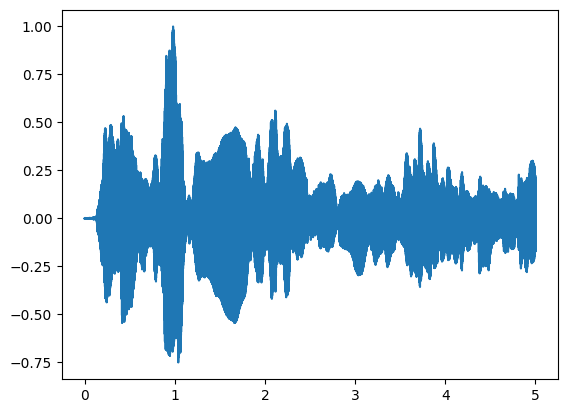

In [12]:
wave.plot()

Выберем сегмент с (ну примерно) постоянной высотой звука

In [13]:
segment = wave.segment(start=4, duration=0.3)
segment.make_audio()

Вот как выглядит этот сегмент:

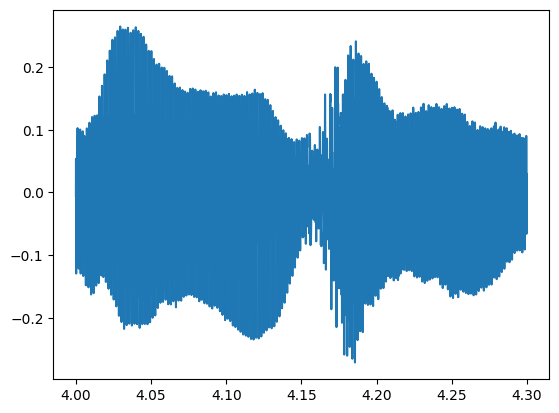

In [14]:
segment.plot()

Вот сегмент еще меньше, чтобы увидеть форму волны

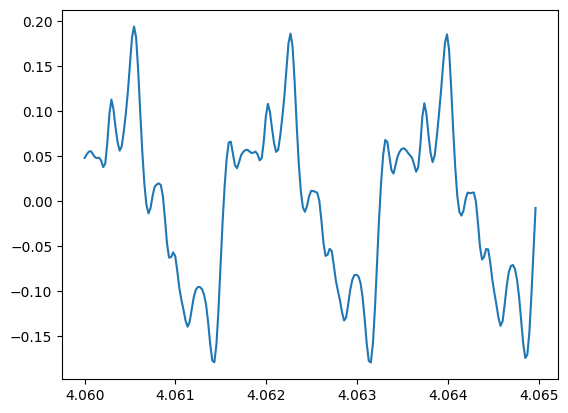

In [15]:
segment.segment(start=4.06, duration=0.005).plot()

Так выглядит спектр:

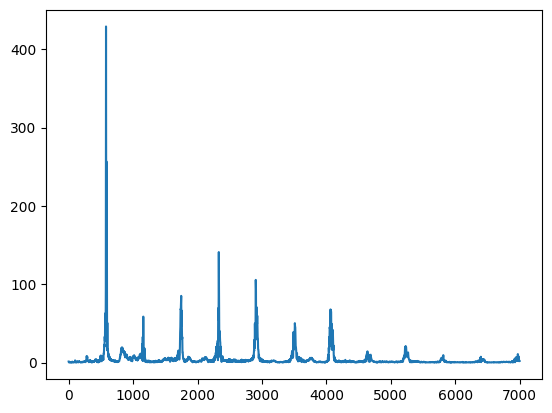

In [24]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

Тут довольно мало спектральных компонент, выведем все пики

In [25]:
spectrum.peaks()[:10]

[(429.21639814559614, 580.0),
 (256.7164590539557, 586.6666666666667),
 (184.30555867871672, 593.3333333333334),
 (147.58136282453515, 583.3333333333334),
 (141.041794735918, 2330.0),
 (105.51466045349845, 2903.3333333333335),
 (93.62736573216742, 2906.666666666667),
 (90.18720757913846, 576.6666666666667),
 (85.09142753465986, 1746.6666666666667),
 (76.78888177588198, 1743.3333333333335)]

Доминирующая частота с самой большой амплитудой - 580 Гц. Определить основную частоту довольно сложно.

Уберем высокие частоты (`low_pass`)

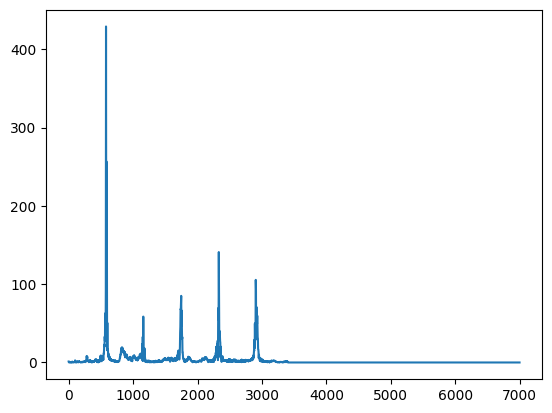

In [29]:
spectrum_low = spectrum.copy()
spectrum_low.low_pass(3400)
spectrum_low.plot(high=7000)

In [30]:
spectrum_low.make_wave().make_audio()

Уберем низкие частоты (`high_pass`)

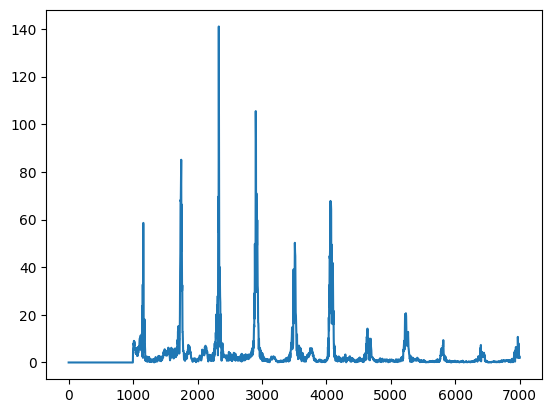

In [31]:
spectrum_high = spectrum.copy()
spectrum_high.high_pass(1000)
spectrum_high.plot(high=7000)

In [32]:
spectrum_high.make_wave().make_audio()

### Упражнение 2

Создадим сигнал из компонентов SinSignal и CosSignal

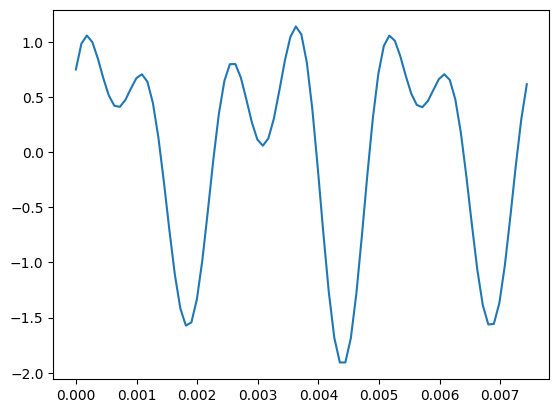

In [48]:
from ThinkDSP.code.thinkdsp import SinSignal, CosSignal

signal = (
    SinSignal(freq=400, amp=1) +
    CosSignal(freq=800, amp=0.75) +
    SinSignal(freq=600, amp=0.25)
)

signal.plot()

Послушаем

In [49]:
wave = signal.make_wave()
wave.make_audio()

Посмотрим спектр волны

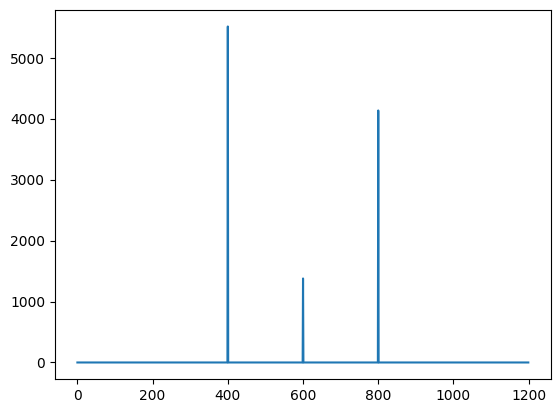

In [50]:
spectrum = wave.make_spectrum()
spectrum.plot(high=1200)

Частота всех компонентов кратна 200 Гц, поэтому мы слышим когерентно звучащий тон. Добавим компоненту с частотой некратной 200 Гц.

In [51]:
signal += CosSignal(freq=550)
signal.make_wave().make_audio()

Мы можем слышать этот компонент в виде отличающегося тона

### Упражнение 3

In [62]:
wave = read_wave(filename)
wave.normalize()
wave.make_audio()

Напишем функцию которая растягивает волну или сжимает волну (замедляет или ускоряет звук)

In [53]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

Проверим работу

In [63]:
a = wave.copy()
stretch(a, 2)
a.make_audio()

In [64]:
b = wave.copy()
stretch(b, 0.5)
b.make_audio()